<a href="https://colab.research.google.com/github/sambitdash/EVA-2/blob/master/Phase-2/Session-2/EVA_P2S2_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 Session 2 File 2

## Import the Libraries


In [21]:
%tensorflow_version 1.x
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Loading data...


## Load the IMDB data

Ensure the loading is upto maximum words of 10000 only. 

In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [29]:
print(input_train.shape[0], 'train sequences')
print(input_test.shape[0], 'test sequences')

25000 train sequences
25000 test sequences


## Pad Sequences

Pad sequences to maxlen size.

In [30]:

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)


## Model Design

Embedding layer is introduced to reduce the maximum states to a manageable 32 numbers. Leaving out non-embedded sequences would have increased the parameters sizes drastically as part of the states. Unlike preloaded embeddings the embedding layers are computed as a mapping of 10000 chars mapping to 32 output values. 

Since, the embeddings are fairly non-convex, convexity is introduced with L2 normalization. Similar can be carried out for the SimpleRNN as well. A dropout is introduced in the SimpleRNN as well. 

In [31]:
from keras.layers import Dense
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(max_features, 32, embeddings_regularizer=l2(0.001)))
model.add(SimpleRNN(32, recurrent_regularizer=l2(0.001), dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


## Model Training

Overfitting is controlled and max accuracy achieved in 10 iterations are around 86.9%. Results plotted below. 

In [32]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6710 - acc: 0.6936 - val_loss: 0.4948 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4883 - acc: 0.8178 - val_loss: 0.4601 - val_acc: 0.8302
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4319 - acc: 0.8463 - val_loss: 1.3411 - val_acc: 0.5720
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4302 - acc: 0.8505 - val_loss: 0.5446 - val_acc: 0.8150
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4118 - acc: 0.8619 - val_loss: 0.5299 - val_acc: 0.8144
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.3827 - acc: 0.8714 - val_loss: 0.6884 - val_acc: 0.7246
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.3862 - acc: 0.8731 - val_loss: 0.4070 - val_acc:

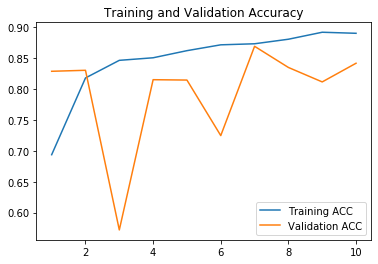

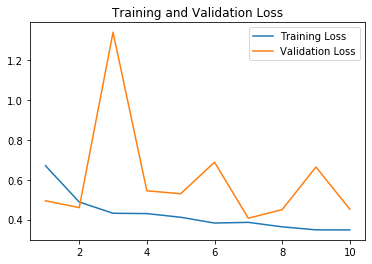

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training ACC')
plt.plot(epochs, val_acc, label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()